### **Análise da taxa de mortalidade SUS de 2010 a 2021**

## **1.0 INTRODUÇÃO**
O seguinte projete foi desenvolviso após o módulo 1 do Bootcamp de DataScience. Nesta primeira etapa do curso analisamos gastos com internações por unidade federativda do SUS, e logo após a sua conclusão foi solicitado aos alunos que realizasse uma análise exploratoria parecida com a que foi realizada em aula porém com outro tipo de dado que é disponibilizado na plataforma do DataSus TabNet. Neste projeto optamos por analisar a taxa de mortalidade por internações em leitos SUS por Unidade Federativa do ano de 2010 até hoje.

## **2.0 Objetivos**
A realização desta análise tem como objetivo demonstrar e verificar alguns dados, tais como:



*   Se houve crescimento ou dimuição na taxa de mortalidade;
*   Atualmente as UF com maior taxa de mortalidade;
*   Verificar se exite de picos na taxa de mortalidade;
*   Verificar como a pandemia de COVID afetou essa taxa e as variações entre as UF;








In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [61]:
dados = pd.read_csv("https://raw.githubusercontent.com/Brubsbarros2465/BOOTCAMP/main/A133533189_28_143_208.csv", 
                    encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=11, engine='python', thousands=".", decimal=",")

In [62]:
dados

,Unidade da Federação,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,Total
0,11 Rondônia,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,2.23,2.14,2.26,2.09,2.98,2.90,1.93,1.87,2.12,1.69,2.81,2.63,2.16,2.53,2.77,2.73,2.44,2.45,2.34,2.37,2.49,2.70,2.59,2.58,...,3.03,2.80,2.78,2.69,2.77,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.21,5.34,5.61,4.58,3.59,2.94,4.42,5.09,5.54,8.22,9.90,2.88
1,12 Acre,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,3.29,3.29,2.47,3.52,3.15,3.41,2.65,2.52,2.76,2.74,1.36,2.61,3.05,2.39,2.41,2.74,2.39,1.80,2.57,2.74,2.21,2.33,3.24,2.41,...,2.64,2.73,2.29,2.87,3.76,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98,3.65,5.40,5.17,7.79,3.07
2,13 Amazonas,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,2.55,2.26,2.49,2.54,1.96,2.48,2.47,2.61,2.01,2.65,2.56,2.37,2.59,2.20,2.49,2.52,2.31,2.21,2.39,2.26,2.49,2.39,2.53,2.43,...,2.83,3.25,3.04,3.39,3.48,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.37,9.78,6.08,4.61,4.40,3.95,4.74,4.35,9.09,9.31,10.88,7.25,3.09
3,14 Roraima,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,2.08,1.84,2.38,2.43,2.06,1.85,2.10,2.23,2.08,2.71,2.77,2.37,2.45,2.55,2.49,2.14,2.29,2.28,2.38,1.61,2.25,2.59,1.87,2.50,...,2.83,2.19,2.69,2.94,3.61,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63,6.02,9.75,8.76,6.60,2.83
4,15 Pará,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,1.67,1.73,1.67,1.56,1.72,2.01,1.92,1.83,1.85,1.90,1.80,1.82,1.98,1.75,1.74,1.91,1.89,2.13,2.00,2.00,2.22,2.17,2.08,2.00,...,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.31,2.75,2.82,2.90,3.17,3.49,4.20,4.06,2.27
5,16 Amapá,2.89,2.67,2.38,2.89,1.51,2.71,2.52,1.71,2.22,1.82,2.30,2.11,2.66,2.66,2.07,2.44,2.59,2.44,3.08,1.72,2.52,1.63,2.08,2.43,3.76,2.81,2.13,2.72,2.62,2.62,2.69,2.26,2.27,3.13,2.48,2.43,2.57,2.44,2.14,...,2.92,2.65,3.53,4.19,2.97,2.90,2.45,2.09,2.27,2.65,2.28,3.19,2.08,3.17,3.34,3.05,2.82,2.48,2.45,2.25,2.88,2.88,2.42,3.11,2.18,2.44,4.16,8.83,7.62,7.18,4.85,2.72,3.21,2.63,4.96,3.83,4.11,6.10,5.45,2.82
6,17 Tocantins,2.70,2.65,2.94,2.31,2.33,2.29,2.66,2.49,2.13,2.78,2.61,2.65,2.49,2.67,2.31,2.63,2.45,2.40,2.78,2.65,2.33,2.24,2.07,1.64,2.08,2.71,2.52,2.28,2.47,2.37,2.62,2.44,2.80,2.75,2.88,2.26,2.64,2.58,2.66,...,3.13,3.60,3.25,2.85,2.48,3.37,3.60,3.16,3.32,3.20,2.50,4.32,4.32,4.05,3.42,3.04,3.42,2.97,2.94,3.33,3.07,3.42,3.04,3.76,3.67,4.21,3.70,3.92,4.67,5.39,5.28,5.58,4.83,4.65,4.18,4.13,4.88,5.84,7.44,2.99
7,21 Maranhão,1.28,1.32,1.45,1.37,1.32,1.37,1.44,1.31,1.30,1.25,1.36,1.16,1.39,1.33,1.66,1.48,1.56,1.30,1.32,1.63,1.69,1.41,1.70,1.55,1.71,1.86,1.54,1.94,1.83,1.82,1.96,1.78,1.73,1.73,1.78,1.90,2.09,1.85,1.69,...,2.39,2.23,2.41,2.42,2.43,2.25,2.22,2.07,1.99,2.13,2.29,2.63,2.32,2.61,2.27,2.45,2.63,2.36,2.50,2.26,2.34,2.22,2.28,2.48,2.50,2.75,3.18,6.21,6.72,4.81,3.59,3.30,3.26,3.23,

In [63]:
## RENOMEANDO COLUNAS##
mapa = {'Unidade da Federação': 'UF'}
dados.rename(columns=mapa, inplace=True)

In [64]:
dados

,UF,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,Total
0,11 Rondônia,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,2.23,2.14,2.26,2.09,2.98,2.90,1.93,1.87,2.12,1.69,2.81,2.63,2.16,2.53,2.77,2.73,2.44,2.45,2.34,2.37,2.49,2.70,2.59,2.58,...,3.03,2.80,2.78,2.69,2.77,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.21,5.34,5.61,4.58,3.59,2.94,4.42,5.09,5.54,8.22,9.90,2.88
1,12 Acre,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,3.29,3.29,2.47,3.52,3.15,3.41,2.65,2.52,2.76,2.74,1.36,2.61,3.05,2.39,2.41,2.74,2.39,1.80,2.57,2.74,2.21,2.33,3.24,2.41,...,2.64,2.73,2.29,2.87,3.76,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98,3.65,5.40,5.17,7.79,3.07
2,13 Amazonas,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,2.55,2.26,2.49,2.54,1.96,2.48,2.47,2.61,2.01,2.65,2.56,2.37,2.59,2.20,2.49,2.52,2.31,2.21,2.39,2.26,2.49,2.39,2.53,2.43,...,2.83,3.25,3.04,3.39,3.48,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.37,9.78,6.08,4.61,4.40,3.95,4.74,4.35,9.09,9.31,10.88,7.25,3.09
3,14 Roraima,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,2.08,1.84,2.38,2.43,2.06,1.85,2.10,2.23,2.08,2.71,2.77,2.37,2.45,2.55,2.49,2.14,2.29,2.28,2.38,1.61,2.25,2.59,1.87,2.50,...,2.83,2.19,2.69,2.94,3.61,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63,6.02,9.75,8.76,6.60,2.83
4,15 Pará,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,1.67,1.73,1.67,1.56,1.72,2.01,1.92,1.83,1.85,1.90,1.80,1.82,1.98,1.75,1.74,1.91,1.89,2.13,2.00,2.00,2.22,2.17,2.08,2.00,...,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.31,2.75,2.82,2.90,3.17,3.49,4.20,4.06,2.27
5,16 Amapá,2.89,2.67,2.38,2.89,1.51,2.71,2.52,1.71,2.22,1.82,2.30,2.11,2.66,2.66,2.07,2.44,2.59,2.44,3.08,1.72,2.52,1.63,2.08,2.43,3.76,2.81,2.13,2.72,2.62,2.62,2.69,2.26,2.27,3.13,2.48,2.43,2.57,2.44,2.14,...,2.92,2.65,3.53,4.19,2.97,2.90,2.45,2.09,2.27,2.65,2.28,3.19,2.08,3.17,3.34,3.05,2.82,2.48,2.45,2.25,2.88,2.88,2.42,3.11,2.18,2.44,4.16,8.83,7.62,7.18,4.85,2.72,3.21,2.63,4.96,3.83,4.11,6.10,5.45,2.82
6,17 Tocantins,2.70,2.65,2.94,2.31,2.33,2.29,2.66,2.49,2.13,2.78,2.61,2.65,2.49,2.67,2.31,2.63,2.45,2.40,2.78,2.65,2.33,2.24,2.07,1.64,2.08,2.71,2.52,2.28,2.47,2.37,2.62,2.44,2.80,2.75,2.88,2.26,2.64,2.58,2.66,...,3.13,3.60,3.25,2.85,2.48,3.37,3.60,3.16,3.32,3.20,2.50,4.32,4.32,4.05,3.42,3.04,3.42,2.97,2.94,3.33,3.07,3.42,3.04,3.76,3.67,4.21,3.70,3.92,4.67,5.39,5.28,5.58,4.83,4.65,4.18,4.13,4.88,5.84,7.44,2.99
7,21 Maranhão,1.28,1.32,1.45,1.37,1.32,1.37,1.44,1.31,1.30,1.25,1.36,1.16,1.39,1.33,1.66,1.48,1.56,1.30,1.32,1.63,1.69,1.41,1.70,1.55,1.71,1.86,1.54,1.94,1.83,1.82,1.96,1.78,1.73,1.73,1.78,1.90,2.09,1.85,1.69,...,2.39,2.23,2.41,2.42,2.43,2.25,2.22,2.07,1.99,2.13,2.29,2.63,2.32,2.61,2.27,2.45,2.63,2.36,2.50,2.26,2.34,2.22,2.28,2.48,2.50,2.75,3.18,6.21,6.72,4.81,3.59,3.30,3.26,3.23,2.76,3.35,3.72,5.7

In [65]:
##EXCLUINDO O TOTAL##
dados = dados.drop(27)

In [66]:
dados

,UF,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,Total
0,11 Rondônia,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,2.23,2.14,2.26,2.09,2.98,2.90,1.93,1.87,2.12,1.69,2.81,2.63,2.16,2.53,2.77,2.73,2.44,2.45,2.34,2.37,2.49,2.70,2.59,2.58,...,3.03,2.80,2.78,2.69,2.77,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.21,5.34,5.61,4.58,3.59,2.94,4.42,5.09,5.54,8.22,9.90,2.88
1,12 Acre,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,3.29,3.29,2.47,3.52,3.15,3.41,2.65,2.52,2.76,2.74,1.36,2.61,3.05,2.39,2.41,2.74,2.39,1.80,2.57,2.74,2.21,2.33,3.24,2.41,...,2.64,2.73,2.29,2.87,3.76,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98,3.65,5.40,5.17,7.79,3.07
2,13 Amazonas,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,2.55,2.26,2.49,2.54,1.96,2.48,2.47,2.61,2.01,2.65,2.56,2.37,2.59,2.20,2.49,2.52,2.31,2.21,2.39,2.26,2.49,2.39,2.53,2.43,...,2.83,3.25,3.04,3.39,3.48,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.37,9.78,6.08,4.61,4.40,3.95,4.74,4.35,9.09,9.31,10.88,7.25,3.09
3,14 Roraima,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,2.08,1.84,2.38,2.43,2.06,1.85,2.10,2.23,2.08,2.71,2.77,2.37,2.45,2.55,2.49,2.14,2.29,2.28,2.38,1.61,2.25,2.59,1.87,2.50,...,2.83,2.19,2.69,2.94,3.61,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63,6.02,9.75,8.76,6.60,2.83
4,15 Pará,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,1.67,1.73,1.67,1.56,1.72,2.01,1.92,1.83,1.85,1.90,1.80,1.82,1.98,1.75,1.74,1.91,1.89,2.13,2.00,2.00,2.22,2.17,2.08,2.00,...,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.31,2.75,2.82,2.90,3.17,3.49,4.20,4.06,2.27
5,16 Amapá,2.89,2.67,2.38,2.89,1.51,2.71,2.52,1.71,2.22,1.82,2.30,2.11,2.66,2.66,2.07,2.44,2.59,2.44,3.08,1.72,2.52,1.63,2.08,2.43,3.76,2.81,2.13,2.72,2.62,2.62,2.69,2.26,2.27,3.13,2.48,2.43,2.57,2.44,2.14,...,2.92,2.65,3.53,4.19,2.97,2.90,2.45,2.09,2.27,2.65,2.28,3.19,2.08,3.17,3.34,3.05,2.82,2.48,2.45,2.25,2.88,2.88,2.42,3.11,2.18,2.44,4.16,8.83,7.62,7.18,4.85,2.72,3.21,2.63,4.96,3.83,4.11,6.10,5.45,2.82
6,17 Tocantins,2.70,2.65,2.94,2.31,2.33,2.29,2.66,2.49,2.13,2.78,2.61,2.65,2.49,2.67,2.31,2.63,2.45,2.40,2.78,2.65,2.33,2.24,2.07,1.64,2.08,2.71,2.52,2.28,2.47,2.37,2.62,2.44,2.80,2.75,2.88,2.26,2.64,2.58,2.66,...,3.13,3.60,3.25,2.85,2.48,3.37,3.60,3.16,3.32,3.20,2.50,4.32,4.32,4.05,3.42,3.04,3.42,2.97,2.94,3.33,3.07,3.42,3.04,3.76,3.67,4.21,3.70,3.92,4.67,5.39,5.28,5.58,4.83,4.65,4.18,4.13,4.88,5.84,7.44,2.99
7,21 Maranhão,1.28,1.32,1.45,1.37,1.32,1.37,1.44,1.31,1.30,1.25,1.36,1.16,1.39,1.33,1.66,1.48,1.56,1.30,1.32,1.63,1.69,1.41,1.70,1.55,1.71,1.86,1.54,1.94,1.83,1.82,1.96,1.78,1.73,1.73,1.78,1.90,2.09,1.85,1.69,...,2.39,2.23,2.41,2.42,2.43,2.25,2.22,2.07,1.99,2.13,2.29,2.63,2.32,2.61,2.27,2.45,2.63,2.36,2.50,2.26,2.34,2.22,2.28,2.48,2.50,2.75,3.18,6.21,6.72,4.81,3.59,3.30,3.26,3.23,2.76,3.35,3.72,5.7

In [67]:
## TRANSPONDO COLUNA E LINHA PARA FICAR MAIS FACIL A ANALISE##
dados_trans = dados.T

In [68]:
dados_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
UF,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2010/Jan,1.67,2.43,2.04,2.54,1.86,2.89,2.7,1.28,1.99,2.95,2.89,3.86,3.71,2.88,3.32,2.55,4.44,3.67,5.32,4.97,3.56,4.2,4.55,3.5,3.36,2.46,2.98
2010/Fev,1.22,1.91,1.63,2.57,1.65,2.67,2.65,1.32,2,3.18,2.93,3.48,3.66,2.55,2.37,2.49,4.3,3.39,5.59,4.79,3.56,4.02,4.91,3.37,3.24,2.44,3.26
2010/Mar,1.39,2.74,1.8,2.05,1.58,2.38,2.94,1.45,1.85,2.91,2.59,3.53,3.28,2.6,2.59,2.47,3.89,3.66,5.14,4.48,3.49,4.05,4.37,3.18,2.95,2.43,2.46
2010/Abr,1.55,2.98,1.77,1.86,1.66,2.89,2.31,1.37,2.05,3.05,2.78,3.48,3.44,2.4,3.71,2.51,3.97,3.33,5.28,4.57,3.38,3.56,4.19,3.38,3.01,2.25,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/Jan,5.09,3.65,9.09,6.02,3.17,3.83,4.13,3.35,3.85,4.71,4.94,7.62,6.82,5.49,5.79,5.24,6.77,6.52,9.93,7.11,6.36,6.08,7.5,6.28,4.67,5.41,3.69
2021/Fev,5.54,5.4,9.31,9.75,3.49,4.11,4.88,3.72,4.61,4.75,5.76,7.27,6.26,5.13,6.96,5.42,6.46,5.74,9.37,7.08,6.33,6.32,7.18,5.72,4.86,5.45,3.64
2021/Mar,8.22,5.17,10.88,8.76,4.2,6.1,5.84,5.79,4.87,6.24,5.8,8.47,6.76,6.58,6.34,5.69,7.91,6.76,10.21,9.17,8.42,8.66,10.91,6.78,7.3,8.65,5.23
2021/Abr,9.9,7.79,7.25,6.6,4.06,5.45,7.44,7.08,6.44,8.2,7.26,8.97,7.56,7.5,8.32,6.26,9.57,8.35,12.07,11.09,8.83,8.93,11.59,8.2,7.85,8.81,7.73


In [70]:
dados = dados.set_index("UF")

In [71]:
dados.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='UF')

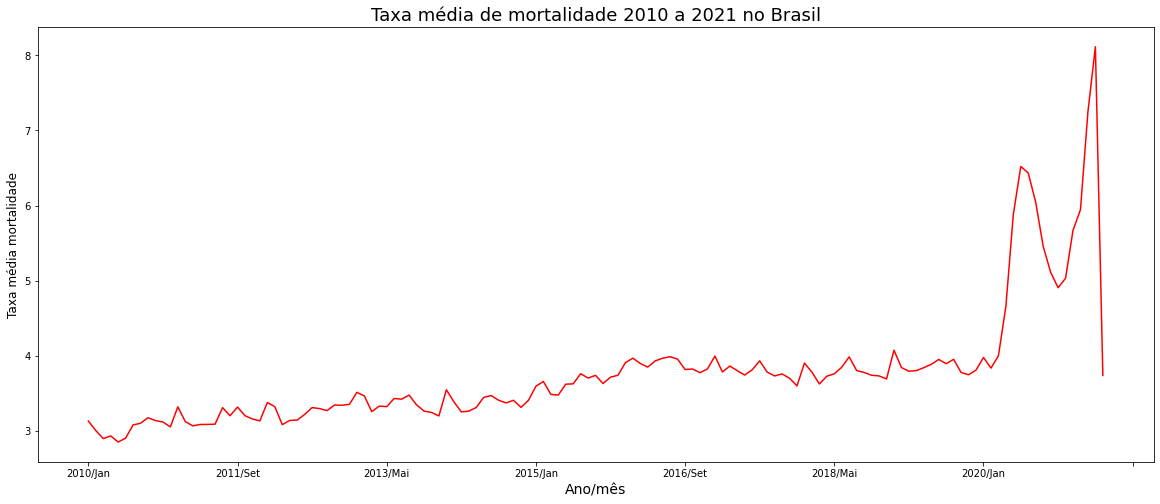

In [97]:
ax = dados.mean().plot(figsize=(20,8), color="red", )
ax.set_xlabel('Ano/mês', fontsize=14)
ax.set_ylabel("Taxa média mortalidade", fontsize=12)
plt.title("Taxa média de mortalidade 2010 a 2021 no Brasil", fontsize=18)
plt.show()

Neste primeiro grafico já conseguimos observar um crescimento alarmante na taxa média de mortalidade nos anos de 2020 e 2021 o que já é um indicativo dos altos números de mortes que tivemos devido ao COVID-19 nesses ultimos anos.

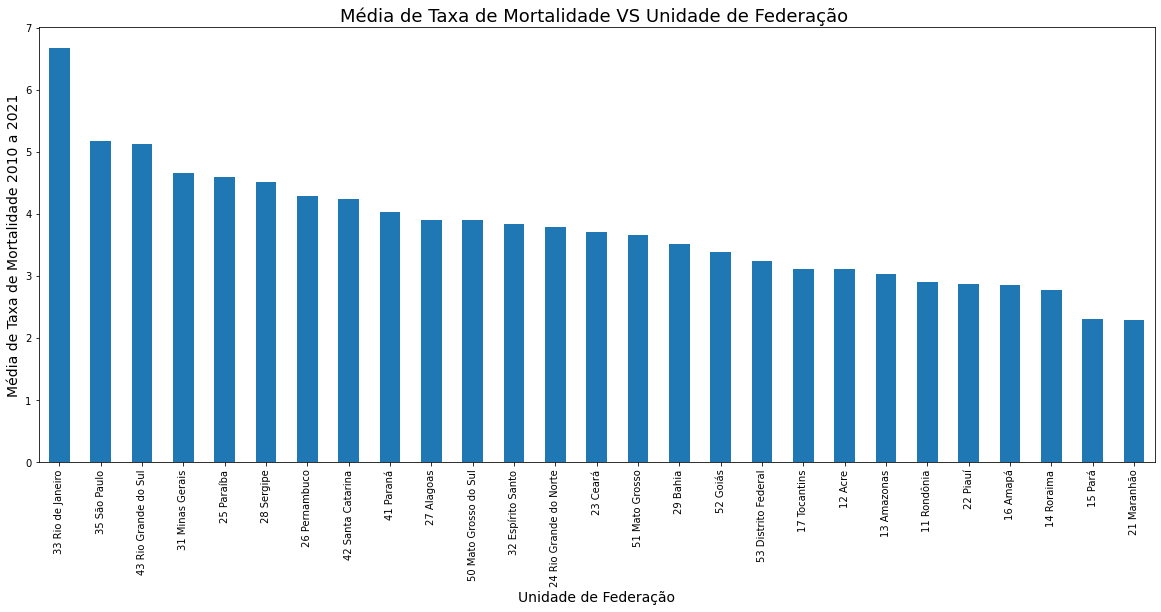

In [94]:
ax = dados.T.mean().sort_values(ascending= False).plot(figsize=(20,8), kind="bar" )
ax.set_xlabel('Unidade de Federação', fontsize=14)
ax.set_ylabel("Média de Taxa de Mortalidade 2010 a 2021", fontsize=14)
plt.title("Média de Taxa de Mortalidade VS Unidade de Federação ", fontsize=18)
plt.show()

Com esse segundo gráfico conseguimos comparar com a análise feita em aula e observar que os 5 estados com as taxas de mortalidades maiores são aqueles tabém que apresentam os maiores gastos com internações

ValueError: ignored

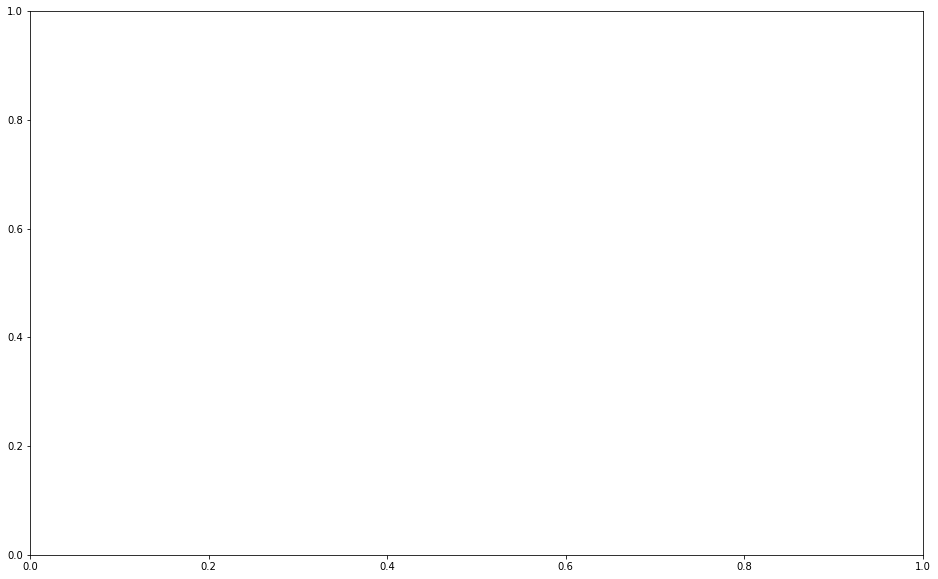

In [122]:
plt.figure(figsize=(16,10))
ax = sns.histplot(data=dados_trans, bins='100', palette='flare')




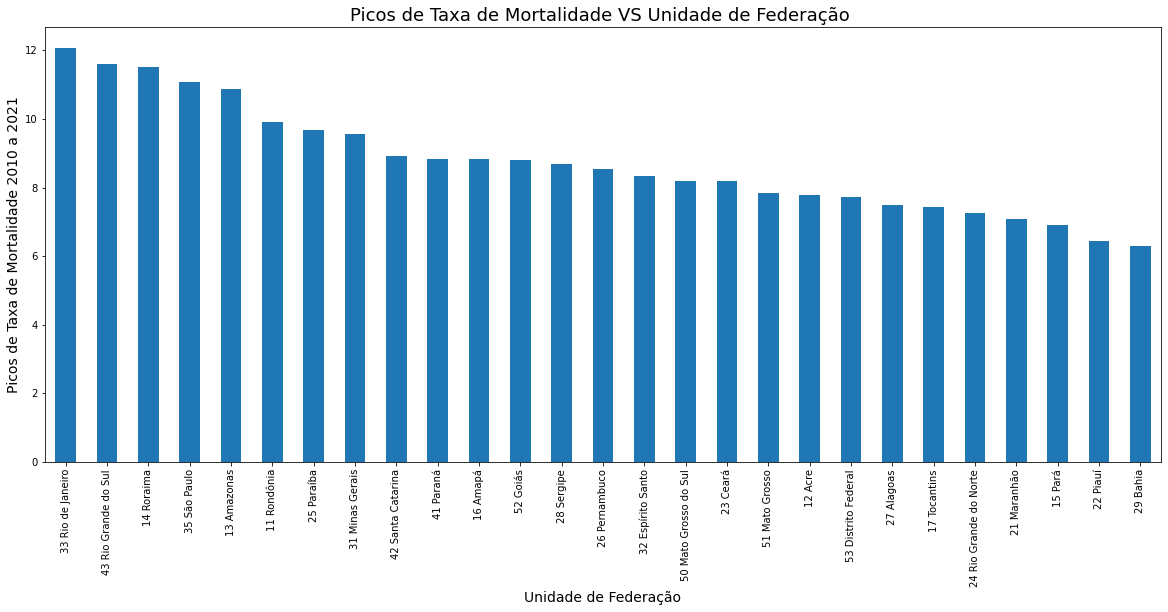

In [124]:
ax = dados.T.max().sort_values(ascending= False).plot(figsize=(20,8), kind="bar" )
ax.set_xlabel('Unidade de Federação', fontsize=14)
ax.set_ylabel("Picos de Taxa de Mortalidade 2010 a 2021", fontsize=14)
plt.title("Picos de Taxa de Mortalidade VS Unidade de Federação ", fontsize=18)
plt.show()

Aqui conseguimos obersavar quais foram os valor maximos da cada taxa alcançados por cada unidade federativa.

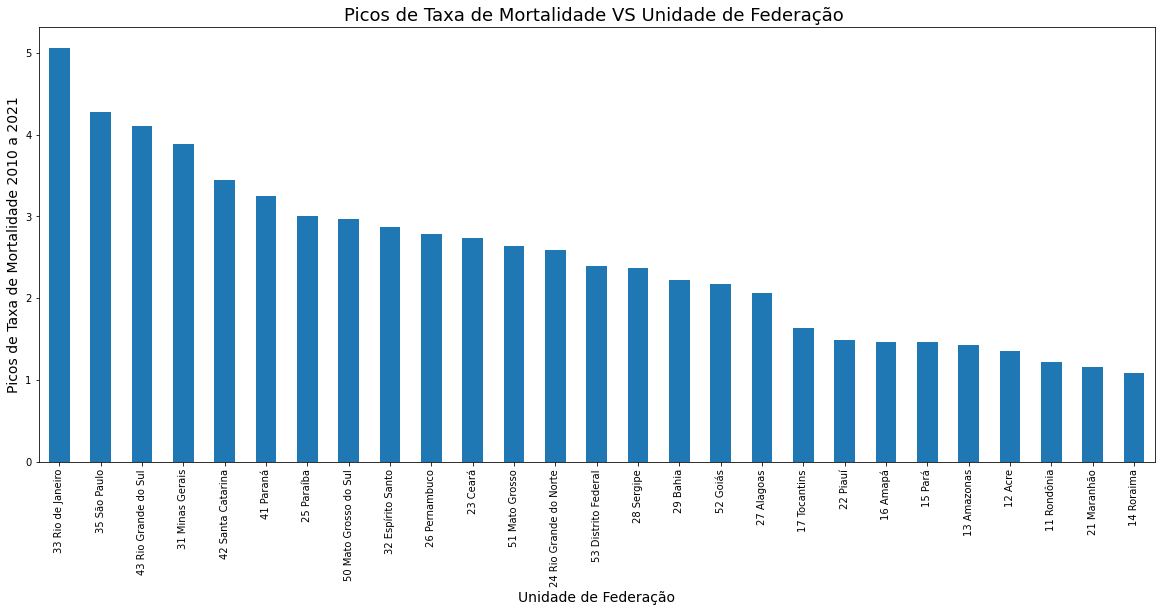

In [125]:
ax = dados.T.min().sort_values(ascending= False).plot(figsize=(20,8), kind="bar" )
ax.set_xlabel('Unidade de Federação', fontsize=14)
ax.set_ylabel("Picos de Taxa de Mortalidade 2010 a 2021", fontsize=14)
plt.title("Picos de Taxa de Mortalidade VS Unidade de Federação ", fontsize=18)
plt.show()

Já aqui conseguimos obersavar quais foram os valor minimo de cada taxa alcançados por cada unidade federativa.


# **3.0 Resultados **
Conseguimos obter diversas informações sobre as taxas de mortalidade pelo total de internações no SUS por Unidade Federativa no período analisado, entre 2010 e 2021:

As taxas variam entre 0.99% (mínima) e 11.52% (máxima) no período estudado;

A taxa também varia bastante por UF.

O estado do Rio de Janeiro é o campeão apresentando as maiores taxa de mortalidade. 

A taxa média apresentou uma tendência de crescimento baixa, variando cerca de 1% de 2011 até o início de 2020, quando houve um súbito crescimento, provavelmente devido à pandemia de Covid 19;

Se compararmos esses dados com os usados no estudo em aula conseguimos observar uma correlação pois os estados que apresentam as maiores taxas de mortalidades são aqueles que apresentam também os maiores gastos com internações.